In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this repository, I want to explore different ways to deal with missing values before creating a model.

Let's create some dummy data to test different methods and observe its effect on the model.

Attribute Information:

1. **Age** (in Years)
2. **Gender** (Male or Female)
3. **Height** (in CM)
4. **Weight** (in KG)

## Age

In this dataset, I want the age distribution to be skewed to the right.

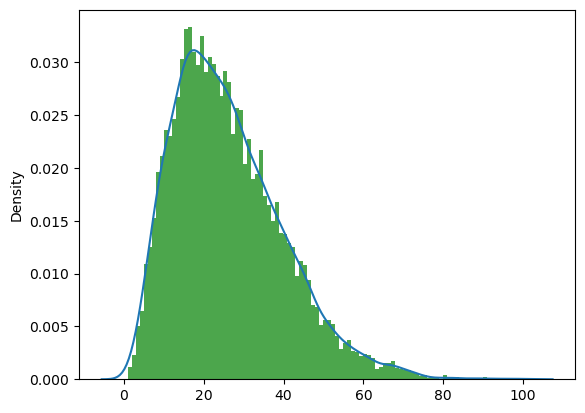

In [2]:
age = stats.beta.rvs(loc = 0, scale = 200, a = 3, b = 20, size = 10000)
plt.hist(age, bins = 100, alpha = 0.7, density=True, color = 'g')
sns.kdeplot(age);

In [3]:
dummy_df = pd.DataFrame(age, columns=['Age'])
dummy_df.describe()

,Age
count,10000.000000
mean,26.108230
std,13.758309
min,0.946607
25%,15.757666
50%,23.919981
75%,34.319253
max,100.866112


The data seems fine. The data looks good. The youngest of the population is 0.7 years old, while the oldest is over 101 years old. 75 percent of the population is younger than 34.14 years old. We can assume that these data are from a developing country with a young population.

## Gender

Considering that women live longer than men, I want the weight of women in the elderly population to be higher than men in this dataset.

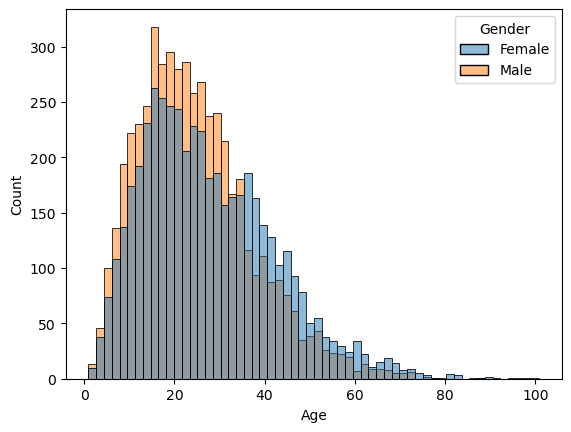

In [4]:
gender_list = []
for i in dummy_df.Age:
    if i<35:
        gender = np.random.choice(['Male', 'Female'], p = [0.55, 0.45])
    elif i < 60:
        gender = np.random.choice(['Male', 'Female'], p = [0.4, 0.6])
    else:
        gender = np.random.choice(['Male', 'Female'], p = [0.3, 0.7])
    gender_list.append(gender)
dummy_df['Gender'] = gender_list
sns.histplot(data = dummy_df, x = 'Age', hue='Gender');

In [5]:
dummy_df.Gender.value_counts()

Male      5127
Female    4873
Name: Gender, dtype: int64

## Height

- Men are going to be taller than women in average.

- Younger people are going to be taller than the older people.

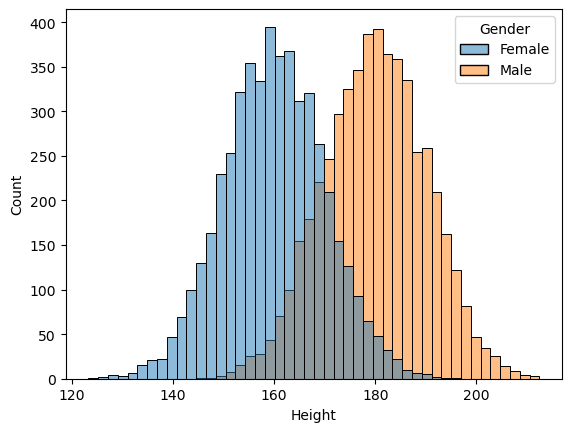

In [6]:
height_list = []
for i in dummy_df.Gender:
    if i == 'Male':
        for j in dummy_df.Age:
            if j < 3:
                height = np.random.normal(loc = 50, scale = 10)
            elif j < 6:
                height = np.random.normal(loc = 75, scale = 10)
            elif j < 10:
                height = np.random.normal(loc = 100, scale = 10)
            elif j < 16:
                height = np.random.normal(loc = 150, scale = 10)
            elif 16<j<35:
                height = np.random.normal(loc = 180, scale = 10)
            elif j < 60:
                height = np.random.normal(loc = 175, scale = 10)
            else:
                height = np.random.normal(loc = 170, scale = 10)
    else:
        for j in dummy_df.Age:
            if j < 3:
                height = np.random.normal(loc = 50, scale = 10)
            elif j < 6:
                height = np.random.normal(loc = 75, scale = 10)
            elif j < 10:
                height = np.random.normal(loc = 100, scale = 10)
            elif j < 16:
                height = np.random.normal(loc = 130, scale = 10)
            elif 16<j<35:
                height = np.random.normal(loc = 160, scale = 10)
            elif j < 60:
                height = np.random.normal(loc = 155, scale = 10)
            else:
                height = np.random.normal(loc = 150, scale = 10)
    height_list.append(height)
dummy_df['Height'] = height_list
sns.histplot(data = dummy_df, x = 'Height', hue='Gender');

## Weight

Weight is dependent on gender and age.

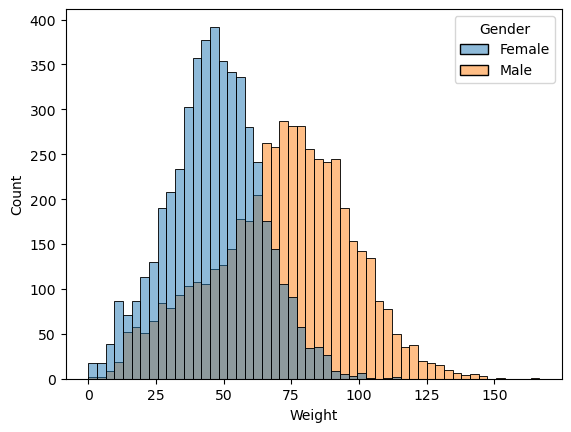

In [7]:
weight_list = []
for i, j in enumerate(dummy_df.Gender):
    if j == 'Male':
        if dummy_df.Age[i]<5:
            bmi = np.random.normal(loc = 5, scale = 1)
        elif dummy_df.Age[i]<10:
            bmi = np.random.normal(loc = 10, scale = 3)
        elif dummy_df.Age[i]<15:
            bmi = np.random.normal(loc = 15, scale = 5)
        else:
            bmi = np.random.normal(loc = 25, scale = 5)
    else:
        if dummy_df.Age[i]<5:
            bmi = np.random.normal(loc = 5, scale = 1)
        elif dummy_df.Age[i]<10:
            bmi = np.random.normal(loc = 10, scale = 5)
        elif dummy_df.Age[i]<15:
            bmi = np.random.normal(loc = 13, scale = 5)
        else:
            bmi = np.random.normal(loc = 20, scale = 5)
    if bmi<0:
        bmi = 1
    weight = bmi * (dummy_df.Height[i]/100)**2
    weight_list.append(weight)
dummy_df['Weight'] = weight_list
sns.histplot(data = dummy_df, x = 'Weight', hue='Gender');

I have tried to create a reasonable relationship between the features. In the following scripts, I am going to use this dataset to explore different ways of dealing with missing values.

In [9]:
dummy_df.to_excel(excel_writer = 'dummy_data.xlsx', index = False)